In [ ]:
from google.colab import drive, output
drive.mount('/content/drive')
import sys
%cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
#sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
#sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')
%load_ext autoreload
%autoreload 1
!pip install torchaudio
!pip install wandb --upgrade
!wandb login
output.clear()

In [ ]:
from __future__ import print_function
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

from six.moves import xrange

#import umap
import wandb
import torch
torch.cuda.empty_cache()
import gc
gc.collect()
torch.cuda.empty_cache()

from scipy import signal
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

from torch.utils.data import random_split
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torch.nn.functional as F

#from ResidualStack import ResidualStack
#from Residual import Residual

from Jaguas_DataLoader import SoundscapeData
from Models import VAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = xm.xla_device()
print(device)

from datetime import timedelta
import wandb
from wandb import AlertLevel

wandb.login()

cpu


wandb: Currently logged in as: danielnieto (use `wandb login --relogin` to force relogin)


True

In [ ]:
root_path = '/content/drive/Shareddrives/ConservacionBiologicaIA/Datos/Jaguas_2018'


dataset = SoundscapeData(root_path, 1, "wav")
dataset_train, dataset_test = random_split(dataset,
                                           [round(len(dataset)*0.0250), len(dataset) - round(len(dataset)*0.0250)], 
                                           generator=torch.Generator().manual_seed(1024))

config = {
    "batch_size" : 32,
    "num_epochs": 5,
    "num_training_updates" : len(dataset_train),
    "num_hiddens" : 64,
    "embedding_dim" : 128,
    "zDim" : 128,
    "commitment_cost" : 0.25,
    "decay" : 0.99,
    "learning_rate" : 1e-3,
    "dataset": "Audios Jaguas",
    "architecture": "VQ-VAE",
}

training_loader = DataLoader(dataset_train, batch_size=config["batch_size"])
test_loader = DataLoader(dataset_test, batch_size=config["batch_size"])


model = VAE(num_hiddens=config["num_hiddens"],
              zDim=config["zDim"]).to(device)

optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"], amsgrad=False)


wandb.finish()
wandb.init(project="VAE-Jaguas", config=config)
wandb.watch(model)


[]

In [ ]:
def testModel(model, iterator):
    model.eval()
    (valid_originals, _,_) = next( iterator)
    valid_originals = torch.reshape(valid_originals, (valid_originals.shape[0] * valid_originals.shape[1], 
                                                  valid_originals.shape[2], valid_originals.shape[3]))
    valid_originals = torch.unsqueeze(valid_originals,1)

    valid_originals = valid_originals.to(device)

    mu, logvar = model.encoder(valid_originals)
    z = model.reparameterize(mu, logvar)
    valid_reconstructions = model.decoder(z)
    output =  torch.cat((valid_originals[0:8], valid_reconstructions[0:8]), 0)
    img_grid = make_grid(output,nrow= 8,pad_value=20)

    recon_error = F.mse_loss(valid_originals, valid_reconstructions)

    fig, ax = plt.subplots(figsize=(20,5))
    ax.imshow(img_grid[1,:,:].cpu(), vmin=0,vmax=1)
    ax.axis("off")
    plt.show()
    return fig, recon_error

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 1 of 502 	 loss: 85.8728
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 2 of 502 	 loss: 85.8685
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 

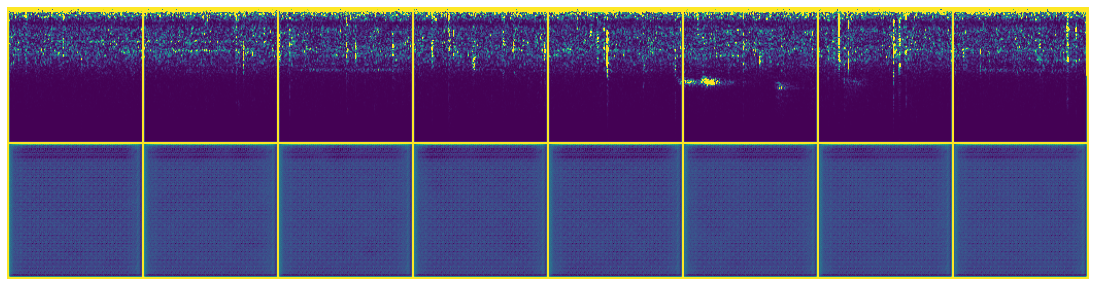

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 101 of 502 	 loss: 85.7416
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 102 of 502 	 loss: 85.7399
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

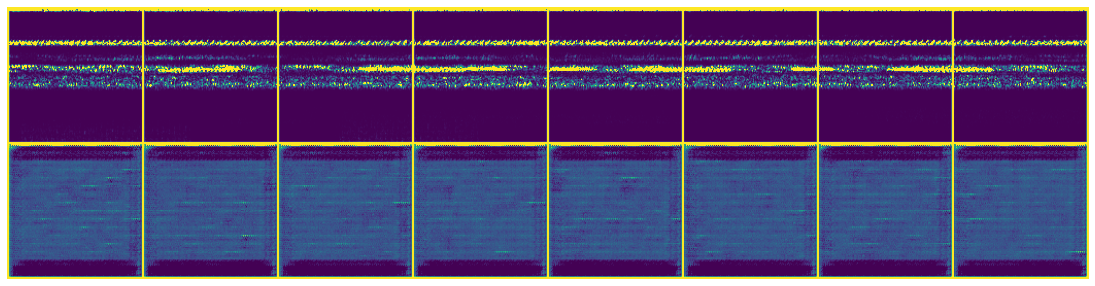

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 201 of 502 	 loss: 84.9971
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 202 of 502 	 loss: 84.929
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 6

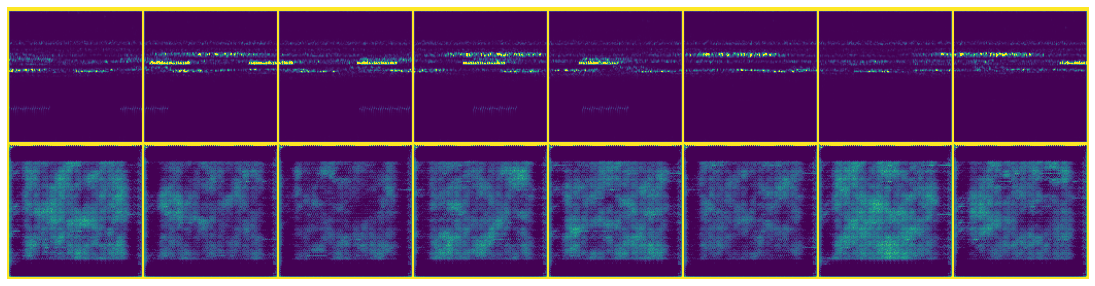

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 301 of 502 	 loss: 83.1036
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 302 of 502 	 loss: 83.1982
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

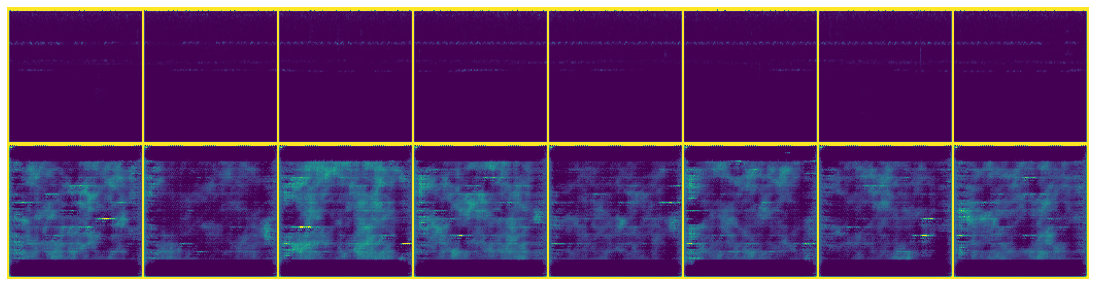

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 401 of 502 	 loss: 77.3256
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 402 of 502 	 loss: 79.4753
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

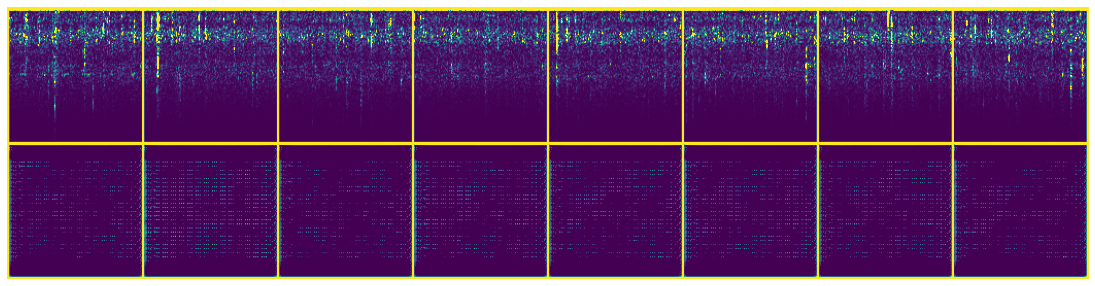

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 501 of 502 	 loss: 83.534
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 0 of 5 	 iteration: 502 of 502 	 loss: 83.4914
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 6

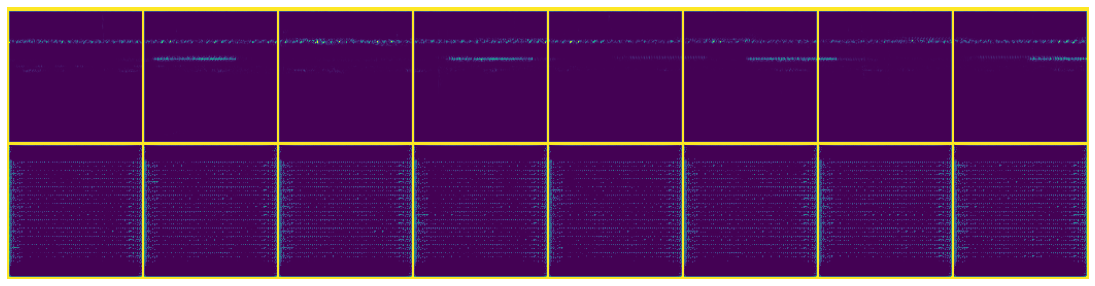

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 101 of 502 	 loss: 83.2919
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 102 of 502 	 loss: 83.3364
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

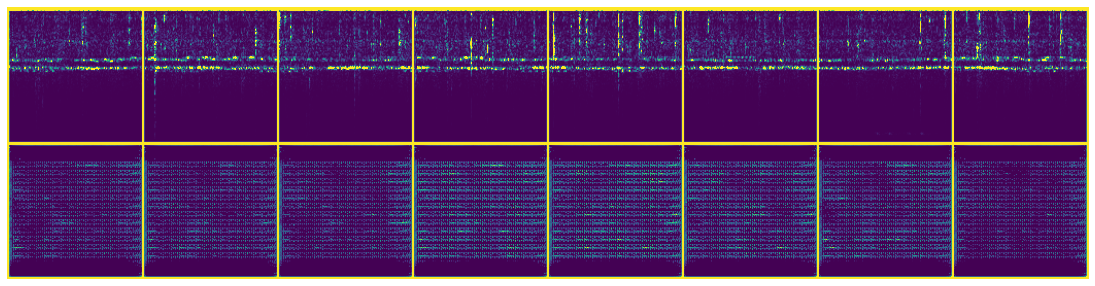

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 201 of 502 	 loss: 82.1617
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 202 of 502 	 loss: 82.7361
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

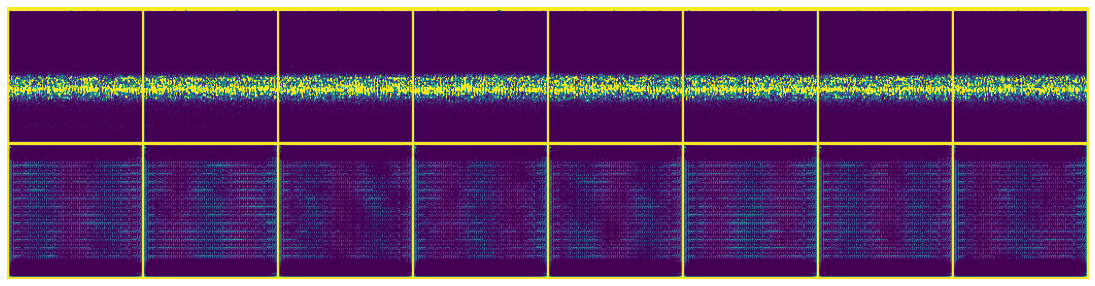

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 301 of 502 	 loss: 83.7049
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 302 of 502 	 loss: 83.6873
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

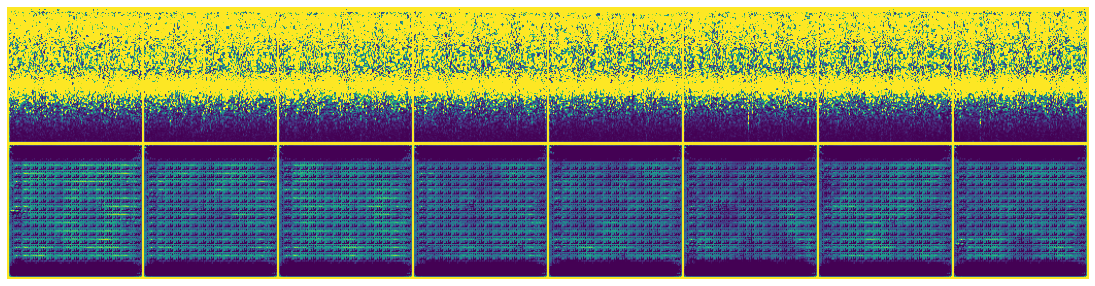

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 401 of 502 	 loss: 83.2305
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 402 of 502 	 loss: 83.2465
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

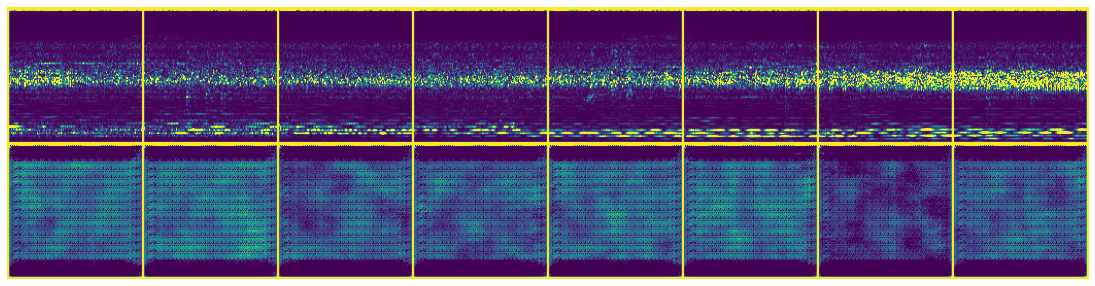

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 501 of 502 	 loss: 83.0737
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 1 of 5 	 iteration: 502 of 502 	 loss: 83.0575
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

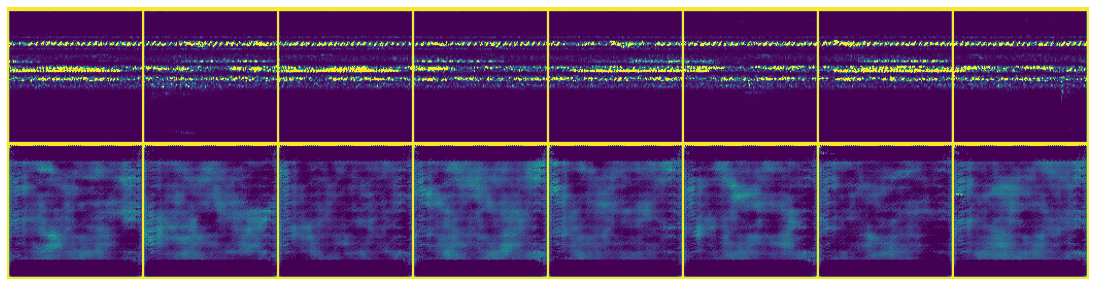

torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 2 of 5 	 iteration: 101 of 502 	 loss: 82.9906
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 62, 62])
conv3: torch.Size([1888, 64, 30, 30])
conv4: torch.Size([1888, 128, 14, 14])
x.view: torch.Size([1888, 25088])
decFC1: torch.Size([1888, 25088])
deconv2: torch.Size([1888, 1, 129, 129])
torch.Size([1888, 1, 129, 129])
epoch: 2 of 5 	 iteration: 102 of 502 	 loss: 82.9682
torch.Size([1888, 1, 129, 129])
inputs shape torch.Size([1888, 1, 129, 129])
conv1: torch.Size([1888, 16, 126, 126])
conv2: torch.Size([1888, 32, 

In [ ]:
model.train()
train_res_recon_error = []
train_res_perplexity = []
iterator = iter(test_loader)
wandb.watch(model, F.mse_loss, log="all", log_freq=1)
error_files = []

for epoch in range(config["num_epochs"]):
  for i in xrange(config["num_training_updates"]):
      model.train()
      try:
         (data, _,_) = next(iter(training_loader))
      except:
        error_files.append[i]
        continue
          
      data = torch.reshape(data, (data.shape[0] * data.shape[1], data.shape[2], data.shape[3]))
      data = torch.unsqueeze(data,1)
      data = data.to(device)
      print(data.shape)
      optimizer.zero_grad()
      data_recon, mu, logvar = model(data)
      print(data_recon.shape)
      
      recon_error = F.mse_loss(data_recon, data) #/ data_variance
      loss = recon_error
      loss.backward()

      optimizer.step()

      print(f'epoch: {epoch} of {config["num_epochs"]} \t iteration: {(i+1)} of {config["num_training_updates"]} \t loss: {np.round(loss.item(),4)}')

      if (i+1) % 5 == 0:
        #torch.save(model.state_dict(),f'model_{epoch}_{i}.pkl')
        fig, test_error = testModel(model, iterator)
        images = wandb.Image(fig, caption= f"recon_error: {np.round(test_error.item(),4)}")
        wandb.log({"examples": images})

wandb.finish()

In [ ]:
a = torch.rand(1062,64,30,30)
s = a.view(1062,64,-1)
print(s.shape)
t = s.view(1062,64,)
print(t.shape)